In [ ]:
cd ~/notebooks/CG1DImaging/VENUS-chopper-design

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from TOF import VENUS_chopper

In [3]:
%matplotlib notebook

In [4]:
Pulse_frequency=60. # Hz
pulse_width=0  # ms
delay=0  # ms
sourceTodetector=25.  # meter
# chopper_rotational_frequency=60. # Hz
chopper_rotational_frequency=30. # Hz
wavelength_center=2  # angstrom

param=(Pulse_frequency,pulse_width,delay,sourceTodetector,chopper_rotational_frequency, wavelength_center)

In [5]:
tmin=0

chp1=VENUS_chopper(*param)

Bandwidth

In [6]:
bandwidth = chp1.frame_wavelength_width()
bandwidth

2.6347305389221556

min and max TOF at detector

In [7]:
Frame_MAXtime=chp1.min_max_tof('max_tof')
Frame_MINtime=chp1.min_max_tof('min_tof')
print Frame_MINtime, Frame_MAXtime

4.31818181818 20.9848484848


In [8]:
Frame_MAXtime - Frame_MINtime

16.666666666666668

Function to calculate chopper opening and closing time

In [9]:
def chpper_openat(chopper_distance):
    return ((Frame_MINtime*chopper_distance)/sourceTodetector)
def chpper_closeAt(chopper_distance):
    return (chpper_openat(chopper_distance)+chp1.Chopper_open_duration(chopper_distance))

In [10]:
chpper_openat(8)

1.381818181818182

wavelengths: [0.2 1.2 2.2 3.2 4.2 5.2 6.2 7.2]


<IPython.core.display.Javascript object>


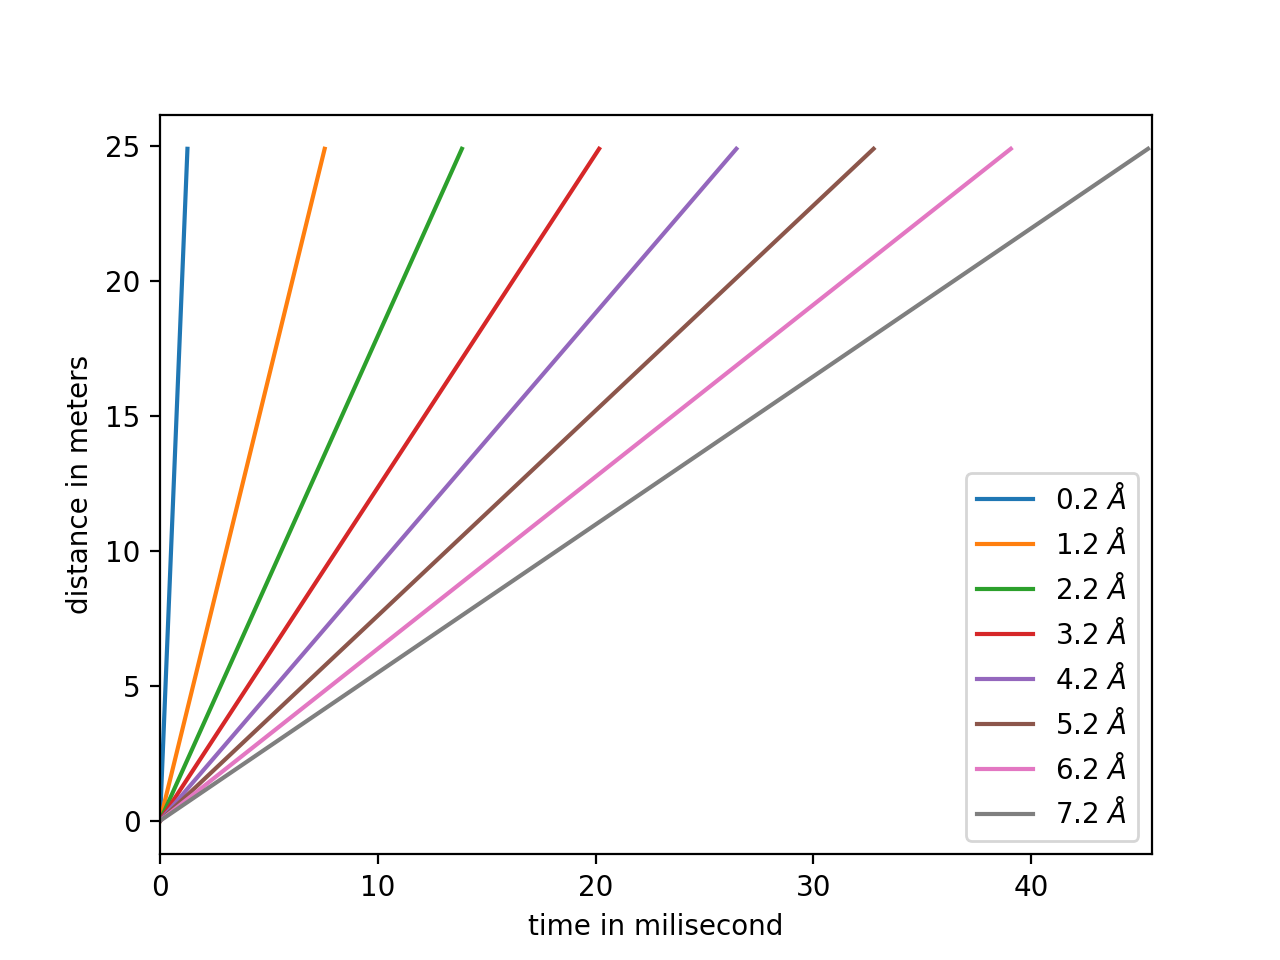

In [11]:
distance=np.arange(0,25,0.1)
wavelengths=np.arange(0.2,8,1)
print "wavelengths:", wavelengths
chopper_distance=np.array([6, 9, 12])

plt.figure()
# lighthouse lines
[plt.plot(chp1.tof(distance,i), distance, label="%s $\AA$" % i) for i in wavelengths]


plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,wavelengths[-1]))
plt.legend()
plt.show()

In [ ]:
distance=np.arange(0,25,0.1)
wavelength=[wavelength_center-bandwidth/2, wavelength_center+bandwidth/2]

plt.figure()
# lighthouse lines
[plt.plot(chp1.tof(distance,i), distance) for i in wavelength]

# horizontal lines
[plt.hlines(i, tmin, chpper_openat(i), colors='k', linestyles='solid')
 for i in chopper_distance]
[plt.hlines(i, chpper_closeAt(i), 
            chp1.tof(sourceTodetector,wavelength[-1]), 
            colors='k', linestyles='solid') 
 for i in chopper_distance]

plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,8))
plt.show()

<IPython.core.display.Javascript object>


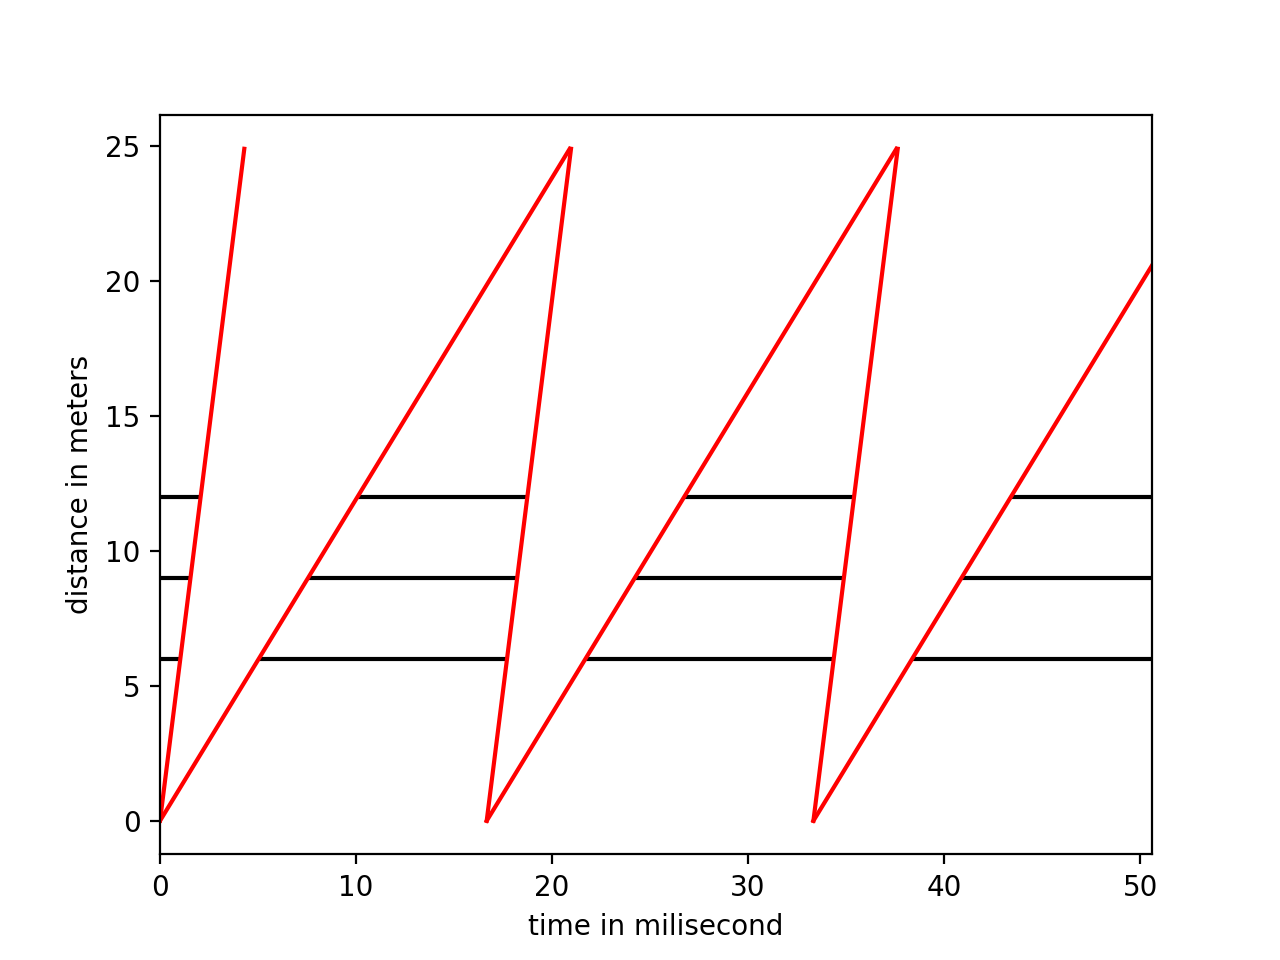

In [12]:
distance=np.arange(0,25,0.1)
wavelength=[wavelength_center-bandwidth/2, wavelength_center+bandwidth/2]
chopper_distance=np.array([6, 9, 12])

Pulse_frequency
plt.figure()

npulse = 3
pulses = range(npulse)
pulse_period = 1000./Pulse_frequency
# lighthouse lines
for pulse in pulses:
    [plt.plot(chp1.tof(distance,i)+pulse*pulse_period,  distance, 'r') for i in wavelength]

# horizontal lines
[
    [plt.hlines(i, chpper_closeAt(i)+(pulse-1)*pulse_period, chpper_openat(i)+(pulse)*pulse_period, 
                colors='k', linestyles='solid')
     for i in chopper_distance]
    for pulse in range(npulse+1)
]

plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,8))
plt.show()

<IPython.core.display.Javascript object>


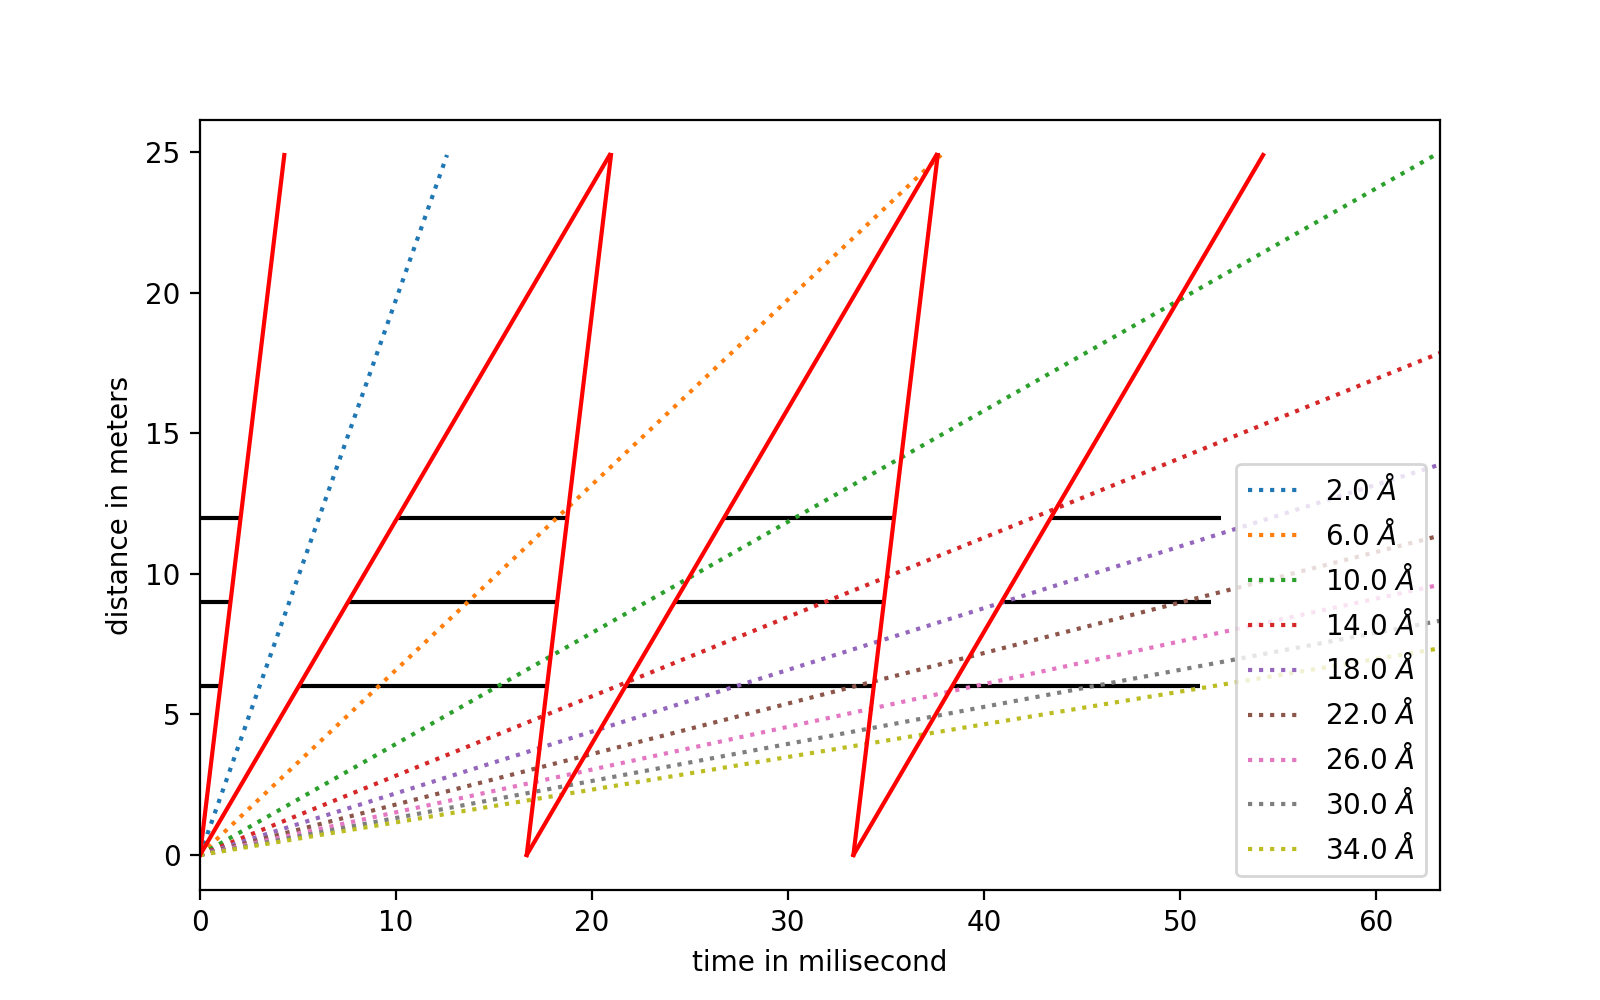

In [13]:
distance=np.arange(0,25,0.1)
wavelengths=[wavelength_center-bandwidth/2, wavelength_center+bandwidth/2]

Pulse_frequency
plt.figure(figsize=(8,5))

wavelengths2=np.arange(2.,35,4)
# lighthouse lines
[plt.plot(chp1.tof(distance,i), distance, ':', label="%s $\AA$" % i) for i in wavelengths2]

npulse = 3
pulses = range(npulse)
pulse_period = 1000./Pulse_frequency
# lighthouse lines
for pulse in pulses:
    [plt.plot(chp1.tof(distance,i)+pulse*pulse_period,  distance, 'r') for i in wavelength]

# horizontal lines
[
    [plt.hlines(i, chpper_closeAt(i)+(pulse-1)*pulse_period, chpper_openat(i)+(pulse)*pulse_period, 
                colors='k', linestyles='solid')
     for i in chopper_distance]
    for pulse in range(npulse+1)
]

plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,10))
plt.legend()
plt.show()